In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('Health Expense Data.csv')
df.head()

,age,sex,bmi,children,smoker,Expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86


<Axes: >

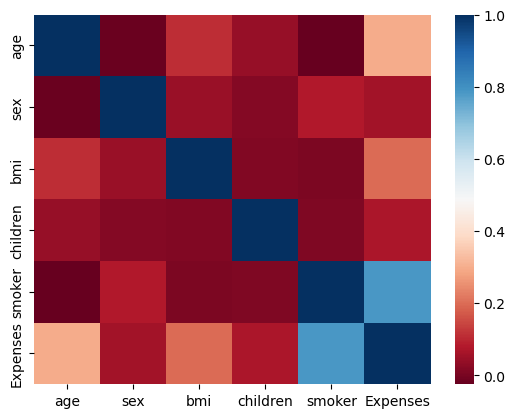

In [4]:
corr = df.corr()
sns.heatmap(corr, cmap='RdBu')

In [5]:
#Regression analysis using statsmodels. 
x = df[['smoker', 'age','sex', 'bmi', 'children']]
y = df['Expenses']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.2, random_state = 42)
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expenses   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.1
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:23:23   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.206e+04    951.231    -12.673      0.000   -1.39e+04   -1.02e+04
smoker      2.382e+04    412.511     57.750      0.000     2.3e+04    2.46e+04
age          257.7192     11.904     21.650      0.000     234.367     281.071
sex         -128.6813    333.350     -0.386      0.700    -782.630     525.267
bmi          322.4516     27.417     11.761      0.000     268.666     376.237
children     474.6020    137.851      3.443      0.001     204.172     745.032
==============================================================================
Omnibus:                      301.233   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.877
Skew:                           1.215   Prob(JB):                    2.91e-157
Kurtosis:                       5.651   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#Alternate model using sklearn
modelalt = LinearRegression()
modelalt.fit(x_train, y_train)

LinearRegression()

In [7]:
print('Intercept: ',modelalt.intercept_)
print('Slope:(smoker,age,sex,bmi,children) ',modelalt.coef_)

Intercept:  -12118.620312680907
Slope:(smoker,age,sex,bmi,children)  [ 2.36530327e+04  2.57050971e+02 -7.87146164e+00  3.27698408e+02
  4.27617117e+02]


In [8]:
#Use model to predict medical expenses
y_pred = modelalt.predict(x_test)

In [9]:
#Compare actual medical expenses to or model's predicted medical expenses. 
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare


,Actual,Predicted
764,9095.07,8561.907488
887,5272.18,6966.166875
890,29330.98,36800.761729
1293,9301.89,9402.553319
259,33750.29,26864.088619
...,...,...
109,47055.53,39222.966242
575,12222.90,11703.732691
535,6067.13,7244.617656
543,63770.43,40948.069383


In [10]:
#Calculate F and P statistics of our model
f_statistic = model.fvalue
p_value = model.f_pvalue
print('Overall Model Significance - F-statistic:', f_statistic, 'p-value:',p_value)

Overall Model Significance - F-statistic: 798.0837559887141 p-value: 0.0


In [11]:
#Calcuate r-squared of our model. 
r_squared = model.rsquared
print('Model Fit - R-squared:', r_squared)

Model Fit - R-squared: 0.7497378438127857
